In [1]:
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
import tensorflow as tf


In [2]:
# 预处理输入数据
def preprocessing(nmp_df,power_df):
    nmp_df.head(10)
    power_df.head(10)
    fix_df=pd.merge(nmp_df, power_df, on=['Datetime'], how='left')
    fix_df.head(10)
    fix_df.describe()

    return fix_df

In [3]:
# 读取数据
his_nmp_fd_df = pd.read_csv('.\\data\\FD001\\03 His_NWP_FD.csv',parse_dates=["Datetime"],index_col=[0])
his_power_fd_df = pd.read_csv('.\\data\\FD001\\02_His_Power_FD.csv',parse_dates=["Datetime"],index_col=[0])
his_fd_df=preprocessing(his_nmp_fd_df,his_power_fd_df)
his_fd_df.to_csv('his_df.csv',encoding = 'utf-8') #存储合并后数据

In [4]:
df=pd.read_csv('his_df.csv',parse_dates=["Datetime"],index_col=[0])
df.head()

,Speed10,Direction10,Speed30,Direction30,Speed50,Direction50,Speed70,Direction70,Speed90,Direction90,Speed100,Direction100,Temper,Pressure,Humidity,Power(MW)
Datetime,,,,,,,,,,,,,,,,
2022-07-15 00:00:00,3.3696,290.3172,4.1829,295.0334,4.9253,297.9698,5.6139,300.0360,6.2446,301.5774,6.5423,302.1353,27.59,1003.96,93.20,0.0216
2022-07-15 00:15:00,3.3092,291.4477,4.1100,296.1286,4.8389,299.0546,5.5137,301.1241,6.1388,302.6287,6.4347,303.2702,27.61,1004.37,93.05,0.0218
2022-07-15 00:30:00,3.4671,295.0868,4.2669,299.3285,5.0000,302.0054,5.6718,303.8582,6.2926,305.2307,6.5832,305.7906,27.62,1004.25,92.96,0.4021
2022-07-15 00:45:00,3.6896,296.9123,4.4933,300.7888,5.2253,303.4468,5.9067,305.1430,6.5341,306.5367,6.8241,307.1386,27.62,1003.96,92.82,0.5867
2022-07-15 01:00:00,3.7095,298.4995,4.5220,302.3546,5.2791,304.8942,5.9740,306.6973,6.6113,307.9966,6.9170,308.5434,27.64,1003.68,92.59,0.3889


In [5]:
df.tail()

,Speed10,Direction10,Speed30,Direction30,Speed50,Direction50,Speed70,Direction70,Speed90,Direction90,Speed100,Direction100,Temper,Pressure,Humidity,Power(MW)
Datetime,,,,,,,,,,,,,,,,
2022-07-21 22:45:00,4.5521,307.3230,6.1812,312.0492,7.6793,314.6835,8.4867,316.0503,8.6879,316.8657,8.7815,317.1689,27.90,1009.53,87.03,2.3584
2022-07-21 23:00:00,4.5931,308.9910,5.4076,312.4519,6.1518,314.8683,6.7197,316.4472,6.8998,317.2906,6.9864,317.6105,27.92,1010.14,0.00,2.8011
2022-07-21 23:15:00,3.3338,303.4994,4.6673,310.4815,5.9120,314.1776,6.7329,316.0832,6.9197,316.9911,7.0061,317.3137,27.44,1009.89,0.00,3.6597
2022-07-21 23:30:00,3.2299,299.8989,4.5556,308.4045,5.8027,312.7652,6.6115,314.9387,6.7961,315.8942,6.8890,316.2939,27.46,1009.84,0.00,3.4466
2022-07-21 23:45:00,3.4215,297.3140,4.7503,306.2668,6.0103,311.0873,6.7556,313.3806,6.9372,314.3576,7.0216,314.8269,27.46,1009.69,0.00,3.0725


In [6]:
df.shape

(672, 16)

In [7]:
# # 划分train valid test集
# fd_df_train = df[:int(0.6*len(df))]
# fd_df_valid = df[int(0.6*len(df)):int(0.8*len(df))]
# fd_df_test =df[int(0.8*len(df)):]

In [8]:
# 划分train valid test集
fd_df_train = df[:int(0.6*len(df))]
fd_df_valid = df[int(0.8*len(df)):]
fd_df_test =df[int(0.8*len(df)):]

In [9]:
# 对数据进行归一化处理
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(df)
df_for_training_scaled = scaler.transform(fd_df_train)
df_for_validing_scaled=scaler.transform(fd_df_valid)
df_for_testing_scaled=scaler.transform(fd_df_test)

In [10]:
# 分离x与y
def createXY(array, days_used_to_train=7):
    features = list()
    labels = list()

    for i in range(days_used_to_train, len(array)):
        features.append(array[i-days_used_to_train:i, :])
        labels.append(array[i, -1])
    return np.array(features), np.array(labels)

train_X,train_y=createXY(df_for_training_scaled)
valid_X,valid_y=createXY(df_for_validing_scaled)
test_X,test_y=createXY(df_for_testing_scaled)

In [11]:
df_X,df_y=createXY(np.array(df))

In [12]:
train_X.shape

(396, 7, 16)

In [13]:
train_y.shape

(396,)

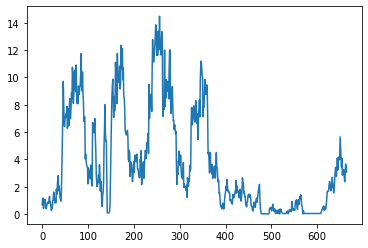

In [14]:
plt.plot(range(len(df_y)), df_y, label='history')

In [15]:
# from sklearn.metrics import make_scorer
# AR_score = make_scorer(AR, greater_is_better=True, needs_proba = True) #同roc_auc_score方法相同，输出结果为类别的概率值
# KS_score = make_scorer(KS, greater_is_better=True, needs_proba = True)
# scoring = {'AR': AR_score, 'KS': KS_score}
# gsearch = GridSearchCV(estimator = bestclf, param_grid = param_test,scoring=scoring, n_jobs=1,cv=ps, refit ='AR')


In [16]:
# 定义一个新的评价函数
def ev(y_true, y_predict):
    difference=((np.array(y_true) - np.array(y_predict.flatten()))**2).sum()
    return float(difference) 

In [17]:
from sklearn.metrics import make_scorer
my_scorer = make_scorer(ev, greater_is_better=True) 
scoring = {
    'ev': my_scorer
}

In [18]:
# y_true=np.array([1,2])
# y_true
# y_predict=np.array([[2],[9]])
# y_predict
# errror_valueing(y_true, y_predict)

In [19]:
def build_model(optimizer,size):
    tf.random.set_seed(1) #设置随机数种子
    # Create grid_model
    grid_model = tf.keras.Sequential()
    grid_model.add(tf.keras.layers.LSTM(units=64))
    grid_model.add(tf.keras.layers.Dense(64))
    grid_model.add(tf.keras.layers.Dense(size))
    grid_model.add(tf.keras.layers.Dense(1))

    # Compile the grid_model
    grid_model.compile(
    optimizer='adam',
    loss='mse')

    return grid_model

In [20]:
from keras.wrappers.scikit_learn import KerasClassifier
grid_model = KerasRegressor(build_fn=build_model)

C:\Users\23966\AppData\Local\Temp\ipykernel_28036\560159353.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model)


In [21]:
def easy_doing(begin,end,step):
    value=[]
    i=begin
    for i in np.arange(begin, end, step):
        value.append(i)
    return value

In [22]:
# parameters = {'batch_size' : [32],'epochs' : [40,41],'optimizer' : ['adam'],'size' : [32]}

In [23]:
# parameters = {'batch_size' : easy_doing(12,40,4),'epochs' : easy_doing(30,60,4),'optimizer' : ['adam'],'size' : easy_doing(16,64,4)}

In [24]:
parameters = {'batch_size' : [32],'epochs' : [40],'optimizer' : ['adam'],'size' : [32]}

In [25]:
grid_search = GridSearchCV(estimator = grid_model,
                          param_grid = parameters,
                          scoring=scoring, 

                           refit ='ev', 
                           n_jobs=1,
                           cv = 2)

In [26]:
grid_search = grid_search.fit(train_X, train_y,
    validation_data=(valid_X, valid_y))

Epoch 1/40
7/7 [==============================] - 2s 69ms/step - loss: 0.1602 - val_loss: 0.6037
Epoch 2/40
7/7 [==============================] - 0s 8ms/step - loss: 0.0335 - val_loss: 0.0158
Epoch 3/40
7/7 [==============================] - 0s 7ms/step - loss: 0.0355 - val_loss: 0.0571
Epoch 4/40
7/7 [==============================] - 0s 7ms/step - loss: 0.0178 - val_loss: 0.1066
Epoch 5/40
7/7 [==============================] - 0s 7ms/step - loss: 0.0167 - val_loss: 0.0430
Epoch 6/40
7/7 [==============================] - 0s 7ms/step - loss: 0.0137 - val_loss: 0.0401
Epoch 7/40
7/7 [==============================] - 0s 7ms/step - loss: 0.0117 - val_loss: 0.0173
Epoch 8/40
7/7 [==============================] - 0s 7ms/step - loss: 0.0101 - val_loss: 0.0125
Epoch 9/40
7/7 [==============================] - 0s 7ms/step - loss: 0.0090 - val_loss: 0.0079
Epoch 10/40
7/7 [==============================] - 0s 7ms/step - loss: 0.0081 - val_loss: 0.0054
Epoch 11/40
7/7 [=====================

13/13 [==============================] - 0s 5ms/step - loss: 0.0127 - val_loss: 0.0043
Epoch 5/40
13/13 [==============================] - 0s 5ms/step - loss: 0.0111 - val_loss: 0.0032
Epoch 6/40
13/13 [==============================] - 0s 5ms/step - loss: 0.0110 - val_loss: 0.0016
Epoch 7/40
13/13 [==============================] - 0s 5ms/step - loss: 0.0098 - val_loss: 0.0015
Epoch 8/40
13/13 [==============================] - 0s 5ms/step - loss: 0.0099 - val_loss: 0.0011
Epoch 9/40
13/13 [==============================] - 0s 5ms/step - loss: 0.0097 - val_loss: 0.0023
Epoch 10/40
13/13 [==============================] - 0s 5ms/step - loss: 0.0095 - val_loss: 0.0027
Epoch 11/40
13/13 [==============================] - 0s 6ms/step - loss: 0.0090 - val_loss: 0.0013
Epoch 12/40
13/13 [==============================] - 0s 5ms/step - loss: 0.0092 - val_loss: 0.0021
Epoch 13/40
13/13 [==============================] - 0s 5ms/step - loss: 0.0086 - val_loss: 0.0014
Epoch 14/40
13/13 [========

In [27]:
# 显示最佳模型参数
grid_search.best_params_

{'batch_size': 32, 'epochs': 40, 'optimizer': 'adam', 'size': 32}

In [28]:
grid_search.best_score_

2.8683888238706134

In [29]:
# 输出最佳模型为my_model
my_model=grid_search.best_estimator_.model
my_model

In [30]:
# # %% 
# # Plotting loss curves
# history=grid_search.best_estimator_.model
# plt.plot(history.history["loss"], label="Training Loss")
# plt.plot(history.history["val_loss"], label="Validation Loss")
# plt.legend()


4/4 [==============================] - 0s 5ms/step


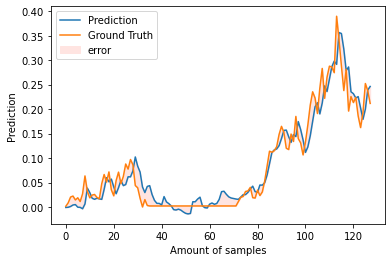

In [31]:
# 查看valid集预测结果
pred_valid_y = my_model.predict(valid_X)
plt.plot(range(len(pred_valid_y)), pred_valid_y, label='Prediction')
plt.plot(range(len(pred_valid_y)), valid_y, label='Ground Truth')
plt.fill_between(range(len(pred_valid_y)), pred_valid_y.flatten(), valid_y.flatten(), color='MistyRose',label='error')
plt.xlabel('Amount of samples')
plt.ylabel('Prediction')
plt.legend()
plt.show()

In [32]:
ev(valid_y,pred_valid_y)

0.10425582516643046

In [33]:
# %%
# Predicting
pred_y = my_model.predict(test_X)


4/4 [==============================] - 0s 2ms/step


In [34]:
pred_y.flatten()

array([-0.00093711, -0.0005779 ,  0.00110158,  0.00409755,  0.00493432,
       -0.00039958, -0.00074694, -0.00365025,  0.00619396,  0.03847266,
        0.02949501,  0.01780466,  0.01567898,  0.01788509,  0.01656445,
        0.01561318,  0.0360915 ,  0.05984577,  0.05136594,  0.05709964,
        0.04125432,  0.02704997,  0.03948111,  0.05424375,  0.04365073,
        0.04589367,  0.0616793 ,  0.06159177,  0.07380262,  0.10222807,
        0.0834016 ,  0.07130285,  0.04092952,  0.02948544,  0.04199499,
        0.04362335,  0.02545075,  0.0135464 ,  0.00745928,  0.00727341,
        0.00416997,  0.02124291,  0.01040354,  0.00677538,  0.00227755,
       -0.0053964 , -0.00618944, -0.00442735, -0.00636609, -0.01001663,
       -0.01295314, -0.01415478, -0.01317318,  0.01070907,  0.0106109 ,
        0.01618243,  0.02005453,  0.00234413, -0.00135446, -0.0020375 ,
        0.00574398,  0.00818791,  0.00549044,  0.00721006,  0.01544425,
        0.03127439,  0.032156  ,  0.02583821,  0.02068185,  0.01

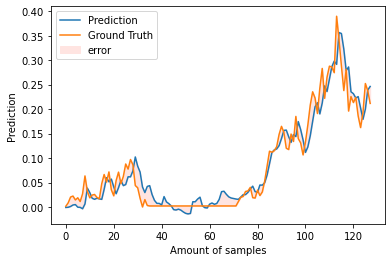

In [35]:
# %% Plotting
plt.plot(range(len(pred_y)), pred_y, label='Prediction')
plt.plot(range(len(pred_y)), test_y, label='Ground Truth')
plt.fill_between(range(len(pred_y)), pred_y.flatten(), test_y.flatten(), color='MistyRose',label='error')
plt.xlabel('Amount of samples')
plt.ylabel('Prediction')
plt.legend()
plt.show()
# %%

In [36]:
# # prediction of feature
# df_30_days_past=df.iloc[-7:,:]
# df_30_days_past.tail()
# df_30_days_future=pd.read_csv('.\\data\\FD001\\04 Fore_NWP_FD.csv',parse_dates=["Datetime"],index_col=[0])
# df_30_days_future
# df_30_days_future.shape
# df_30_days_future["Power(MW)"]=0
# df_30_days_future=df_30_days_future[["Speed10" , "Direction10" , "Speed30" , "Direction30" , "Speed50" , "Direction50" , "Speed70" , "Direction70" , "Speed90" , "Direction90" , "Speed100" , "Direction100" , "Temper" , "Pressure" , "Humidity" , "Power(MW)"]]
# old_scaled_array=scaler.transform(df_30_days_past)
# new_scaled_array=scaler.transform(df_30_days_future)
# new_scaled_df=pd.DataFrame(new_scaled_array)
# new_scaled_df.iloc[:,0]=np.nan
# full_df=pd.concat([pd.DataFrame(old_scaled_array),new_scaled_df]).reset_index().drop(["index"],axis=1)
# full_df_scaled_array=full_df.values
# all_data=[]
# time_step=7
# for i in range(time_step,len(full_df_scaled_array)):
#   data_x=[]
#   data_x.append(
#     full_df_scaled_array[i-time_step :i , 0:full_df_scaled_array.shape[1]])
#   data_x=np.array(data_x)
#   prediction=my_model.predict(data_x)
#   all_data.append(prediction)
#   full_df.iloc[i,0]=prediction
# new_array=np.array(all_data)
# new_array=new_array.reshape(-1,1)
# prediction_copies_array = np.repeat(new_array,16, axis=-1)
# y_pred_future_30_days = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(new_array),16)))[:,0]
# print(y_pred_future_30_days)
# plt.plot(range(len(y_pred_future_30_days)), y_pred_future_30_days, label='Prediction')

In [37]:
# #绘制整体发电量图
# total = np.hstack((df_y,y_pred_future_30_days))
# plt.plot(range(len(total)), total, label='Prediction',color='coral')
# plt.plot(range(len(df_y)), df_y, label='Prediction')

In [38]:
# # prediction of feature
# df_30_days_past=df.iloc[-7:,:]
# df_30_days_past.tail()

In [39]:
# df_30_days_future=pd.read_csv('.\\data\\FD001\\04 Fore_NWP_FD.csv',parse_dates=["Datetime"],index_col=[0])
# df_30_days_future
# df_30_days_future.shape

In [40]:
# df_30_days_future["Power(MW)"]=0

In [41]:
# df_30_days_future

In [42]:
# df_30_days_future=df_30_days_future[["Speed10" , "Direction10" , "Speed30" , "Direction30" , "Speed50" , "Direction50" , "Speed70" , "Direction70" , "Speed90" , "Direction90" , "Speed100" , "Direction100" , "Temper" , "Pressure" , "Humidity" , "Power(MW)"]]

In [43]:
# old_scaled_array=scaler.transform(df_30_days_past)

In [44]:
# old_scaled_array.shape

In [45]:
# new_scaled_array=scaler.transform(df_30_days_future)

In [46]:
# new_scaled_array.shape

In [47]:

# new_scaled_df=pd.DataFrame(new_scaled_array)
# new_scaled_df.iloc[:,0]=np.nan
# full_df=pd.concat([pd.DataFrame(old_scaled_array),new_scaled_df]).reset_index().drop(["index"],axis=1)

In [48]:
# full_df.shape

In [49]:
# full_df_scaled_array=full_df.values
# all_data=[]
# time_step=7
# for i in range(time_step,len(full_df_scaled_array)):
#   data_x=[]
#   data_x.append(
#     full_df_scaled_array[i-time_step :i , 0:full_df_scaled_array.shape[1]])
#   data_x=np.array(data_x)
#   prediction=grid_model.predict(data_x)
#   all_data.append(prediction)
#   full_df.iloc[i,0]=prediction

In [50]:
# new_array=np.array(all_data)
# new_array=new_array.reshape(-1,1)
# prediction_copies_array = np.repeat(new_array,16, axis=-1)
# y_pred_future_30_days = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(new_array),16)))[:,0]
# print(y_pred_future_30_days)

In [51]:
# plt.plot(range(len(y_pred_future_30_days)), y_pred_future_30_days, label='Prediction')